In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()
X = iris.data[:, :2]  
# We'll just use the first two features for simplicity (sepal length and sepal width)
y = (iris.target == 0).astype(int)  
# Convert the target to a binary classification (Setosa vs others)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

In [8]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict on the grid points
Z = Z.reshape(xx.shape)

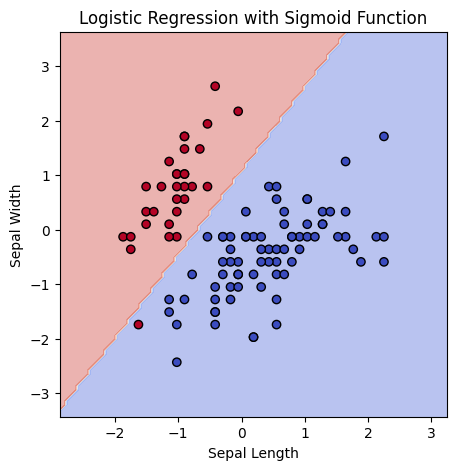

In [10]:
plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression with Sigmoid Function')

plt.show()